In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'tmnist-alphabet-94-characters:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1564532%2F2830968%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240410%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240410T012622Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D891e1193a214ea3f49394ca7d8859654db09ee4255247de1f30bc28b509c9d8adebd0c9a1610f47a9b002f0ce767f73161ef18ff09d77469091b387a0844640deab61b9dcf4760428c981cca4d2afe5cc6734f70498a7c3d6b5ff513634d0085f4f5f8cbc13cbd83d870b81428bca1ad81169a194e6abde866e71c731a971e886b40d83d8d4d55b72a660d9bc3378c67df68c8b48cf500ccc023d0fef4fd2ea299545aa9397ef8b8bb79695b75c6b2f8ee3c3995052d9bd9174039de72a51157fc63f1cfb2c1ad15ee00426387468d0c83771251245cff8811b601f8462bf52060db3cd605e5bf31a42378657272d7a3c1bf385bd910a0afe02c23ceb6e4e981'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 88850214 bytes downloaded
Downloaded and uncompressed: tmnist-alphabet-94-characters
Data source import complete.


In [ ]:
from google.colab import drive
drive.mount('/Mihir-DRIVE')

Drive already mounted at /Mihir-DRIVE; to attempt to forcibly remount, call drive.mount("/Mihir-DRIVE", force_remount=True).


# **Neural Network Type Classification**

# **Abstract**

A benchmark dataset of handwritten Thai numerals, the TMNIST dataset is frequently used in machine learning for image classification applications. It is composed of 10,000 test images and 60,000 training images, each measuring 28 by 28 pixels and depicting a handwritten Thai numeral from 0 to 9. The MNIST dataset, a comparable dataset of handwritten English digits, served as the model for the creation of this new dataset. The introduction of the Tmnist dataset aims to facilitate the development of machine learning algorithms for the recognition of handwritten Thai numerals, a crucial task for numerous applications in Thailand, by researchers and practitioners.
The dataset aims to advance the development of image classification models for Thai characters and is freely accessible for academic and commercial use.


# **Importing necessary libraries**

Hey there! Welcome to the world of neural networks and the TMNIST dataset. Imagine you're a chef and you've got lots of ingredients to make the perfect dish – that's sort of what we're doing here with our code.

1. **Numpy & Pandas**: Think of `numpy` and `pandas` as your prep tools. They help us chop and prepare our data – numbers, lists, tables – so that everything is ready for cooking (or in our case, for the neural network to learn from).

2. **Scikit-learn**: Now we've got some special gadgets from `scikit-learn`. They're like our measuring cups (`train_test_split`) to divide our data into portions – some for learning (training) and some for testing how well we've learned. We've also got a great shuffling tool (`shuffle`) to mix things up and a label maker (`LabelBinarizer`) to keep our data labels neat and organized. Lastly, we have a taste-test tool (`accuracy_score`) to see how yummy our neural network's predictions are.

3. **TensorFlow & Keras**: This is the main event – `tensorflow` and `keras`. They're like our high-tech oven and mixers. With them, we can build our neural network layer by layer – some layers are for mixing (`Dense`), some for baking (`Conv2D`), and some for adding texture (`Dropout`). And just like you don't want to overbake your cake, `EarlyStopping` is like our kitchen timer that stops the training before our model gets overcooked.

4. **Matplotlib**: After all the cooking, we want to present our dish beautifully, right? `matplotlib` is our plating kit. It helps us make pretty graphs to show off our results.

5. **Warnings and Inline Plotting**: Nobody likes a messy kitchen, so we tell our code to ignore any little warnings that pop up – like a spill that's not too important to clean up right now (`warnings.filterwarnings('ignore')`). And we set up our kitchen to show us the food as we plate it, right on the counter (`%matplotlib inline`).

Now, with all these tools and ingredients ready, we're set to make some amazing neural network recipes with the TMNIST dataset! Let's get cooking! 🌟👩‍🍳👨‍🍳

In [ ]:
# Core libraries for data handling
import numpy as np  # For numerical and algebraic operations
import pandas as pd  # For reading and manipulating datasets, especially from CSV files

# Preprocessing and utilities from scikit-learn
from sklearn.model_selection import train_test_split  # To split the dataset into training and test sets
from sklearn.utils import shuffle  # To shuffle the data and ensure it's randomly ordered
from sklearn.preprocessing import LabelBinarizer  # For converting labels into a one-hot encoded format
from sklearn.metrics import accuracy_score, roc_auc_score  # For evaluating the performance of our model

# Deep learning framework
import tensorflow as tf  # The main framework for building and training neural networks
from tensorflow.keras.models import Sequential  # To create a linear stack of neural network layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, SimpleRNN  # Different types of layers we can add to our model
from tensorflow.keras.utils import to_categorical  # For one-hot encoding of labels
from tensorflow.keras.callbacks import EarlyStopping  # To stop training early if the model isn't improving

# Visualization and warning management
import matplotlib.pyplot as plt  # For plotting graphs and visualizing data
import warnings  # To handle warnings that might clutter the notebook

# Setup inline plotting and suppress warnings for a cleaner notebook
%matplotlib inline
warnings.filterwarnings('ignore')


# **Analyzing the dataset**
It starts by loading a CSV file into a pandas DataFrame, which is a table-like data structure that allows for convenient data manipulation in Python. The file '94_character_TMNIST.csv' seems to contain a column named 'labels' where different characters are stored.

Once the DataFrame is ready, the first few rows are displayed using df.head(), which is a quick way to peek at the dataset. The shape of the DataFrame, meaning the number of rows and columns, is also printed out using df.shape to understand the size of the data we are dealing with.

Next, the code extracts all the unique characters present in the 'labels' column to analyze the composition of the dataset. It classifies these characters into four categories: uppercase letters, lowercase letters, digits, and special symbols. This classification is done using regular expressions, which are patterns used to match character combinations in strings. For each category, the code compiles a regular expression that matches the relevant set of characters.

The matching characters are found using the findall method of the compiled regular expressions and stored in lists (or a set, in the case of symbols). The code takes care to discard an underscore character from the set of symbols, likely because it wants to treat it as not significant for the groups being considered.

Finally, the DataFrame is updated with a new column named 'group', which labels each entry based on the category of character it belongs to. It does so by iterating over the groups of characters and assigning a group number to the corresponding rows in the DataFrame.

In essence, this script is a data preprocessing step where the dataset is being enriched with categorical information, which can then be used for further analysis or machine learning tasks.

In [ ]:
# Read the dataset into a pandas dataframe
df = pd.read_csv('/Mihir-DRIVE/MyDrive/Dataset/94_character_TMNIST.csv')
# Display the first few entries of the dataframe
df.head()

# Display the shape of the dataframe
df.shape


(274093, 786)

In [ ]:
import re


In [ ]:
# Extracting unique labels from the dataframe
unique_labels = list(df['labels'].unique())

# Regular expression patterns for checking different types of characters
regex_uc = re.compile(r"[A-Z]")  # uppercase
regex_lc = re.compile(r"[a-z]")  # lowercase
regex_numbers = re.compile(r"[0-9]")  # digits
regex_symbols = re.compile(r"[\W]|[\_\,]")  # special symbols

# Extracting characters based on the regex patterns
lower_case_chars = regex_lc.findall(str(unique_labels))
upper_case_chars = regex_uc.findall(str(unique_labels))
number_chars = regex_numbers.findall(str(unique_labels))
symbol_chars = set(regex_symbols.findall(str(unique_labels)))
symbol_chars.discard('_')  # removing unwanted character from set

# Grouping the labels based on the extracted characters
groups = {'lowercase': lower_case_chars, 'uppercase': upper_case_chars,
          'numbers': number_chars, 'symbols': list(symbol_chars)}
for i, (group_name, char_list) in enumerate(groups.items(), start=1):
    df.loc[df['labels'].isin(char_list), 'group'] = str(i)

`X` will be the features and `y` will be the target variables.

1. `X` is assigned the values from all rows and all columns except the first two and the last one, converting the data type to 'float32'. This implies that the first two columns are likely to be non-feature data (like IDs or labels) and the last column might be the target variable.

2. `y` is created as a DataFrame containing only the 'labels' column.

3. Unique labels are extracted from `y` and assigned to `labels`.

4. A list of numerical values ranging from 0 to the number of unique labels minus one is created as `values`.

5. A dictionary called `label_dict` is created to map the original textual labels to these numerical values.

6. An inverse dictionary, `label_dict_inv`, is also created for the opposite mapping (from numerical values back to textual labels).

7. The 'labels' column in `y` is then updated to the numerical values using the `label_dict`.

8. The content of `label_dict` is printed out to verify the mappings.


In [ ]:
# Data preparation for model training
# Selecting feature columns and converting the data type to float32
X = df.iloc[:, 2:-1].astype('float32')

# Target variable setup
y = df[['labels']].copy()  # Create a copy to avoid modifying the original DataFrame

# Generate a mapping from unique labels to integers
labels = y['labels'].unique()
values = list(range(len(labels)))
label_dict = dict(zip(labels, values))
label_dict_inv = {v: k for k, v in label_dict.items()}  # Inverse mapping

# Apply the mapping to the 'labels' column to convert labels to integers
y['labels'] = y['labels'].map(label_dict)

# Print the mapping dictionary
print(label_dict)


{'6': 0, 'D': 1, 'f': 2, '/': 3, 'F': 4, 'x': 5, 'J': 6, '8': 7, 'H': 8, 'k': 9, '@': 10, '1': 11, '=': 12, 'g': 13, ')': 14, '2': 15, 'd': 16, '^': 17, '3': 18, 't': 19, '#': 20, '.': 21, '4': 22, 'o': 23, '"': 24, 'y': 25, 'A': 26, 'u': 27, 'G': 28, '-': 29, 'm': 30, 'W': 31, '&': 32, 'c': 33, '9': 34, 'N': 35, ']': 36, 'P': 37, 'X': 38, '|': 39, '}': 40, 'h': 41, '7': 42, 'j': 43, '5': 44, '>': 45, '?': 46, 'b': 47, '*': 48, 'w': 49, 'l': 50, '0': 51, '$': 52, 'I': 53, 'Y': 54, '%': 55, ':': 56, 'T': 57, 'K': 58, 'E': 59, '<': 60, 'V': 61, '{': 62, 'M': 63, 'S': 64, 'a': 65, 'i': 66, 'r': 67, "'": 68, 'p': 69, ';': 70, '[': 71, '+': 72, 'e': 73, 'U': 74, '(': 75, 's': 76, '~': 77, ',': 78, 'C': 79, 'q': 80, '_': 81, 'n': 82, 'B': 83, 'z': 84, 'v': 85, 'O': 86, 'R': 87, '`': 88, 'Z': 89, 'Q': 90, 'L': 91, '!': 92, '\\': 93}


# **Model Training:**
Training and Test sets


1. It splits the feature matrix `X` and the target vector `y` into training and testing sets, with an 80-20 split. This means 80% of the data is used for training the model, and the remaining 20% is reserved for testing its performance.

2. It prepares the inputs for neural network training. The training and testing feature sets are reshaped to the size of 28x28, which is the typical size for each image in datasets like MNIST, suggesting that each row in `X` represents a flattened image.

3. It converts the target vectors (`y_train_alt` and `y_test_alt`) into one-hot encoded matrices using the `to_categorical` function. One-hot encoding is necessary for categorical targets in classification tasks.

4. Finally, it prints out the shapes of the prepared training and testing sets for both the features and the targets.


In [ ]:
# Importing the required function from sklearn
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(X, y, test_size=0.2)

# Defining image dimensions
Length, Height = 28, 28
# Determining the number of unique classes for target categorization
NCl = y_train_alt.nunique()[0]

# Reshaping the input data to fit the expected input of a 2D convolution layer
# The reshape assumes one channel (grayscale images). For RGB images, reshape would need an additional dimension.
X_train_alt = X_train_alt.values.reshape((-1, Length, Height, 1))  # -1 infers the number of samples
X_test_alt = X_test_alt.values.reshape((-1, Length, Height, 1))

# One-hot encoding the target variable to prepare for neural network output layer
y_train_alt = to_categorical(y_train_alt['labels'], num_classes=NCl)
y_test_alt = to_categorical(y_test_alt['labels'], num_classes=NCl)

# Printing out the shapes of the processed training and testing data
print(f'X: Train, Test data shapes: {X_train_alt.shape}, {X_test_alt.shape}')
print(f'Y: Train, Test data shapes: {y_train_alt.shape}, {y_test_alt.shape}')


X: Train, Test data shapes: (219274, 28, 28, 1), (54819, 28, 28, 1)
Y: Train, Test data shapes: (219274, 94), (54819, 94)


# **IMPORT NEURAL NETWORKS LIBRARY**

Visualizing a subset of the character images from the training dataset. It starts by shuffling the first 500 training examples and then selects 12 of these to display in a 3x4 grid of subplots. Each image is reshaped to 28x28 pixels for display purposes and then reshaped again to (1,28,28,1) to potentially prepare for input into a convolutional neural network model, though the prediction part isn't explicitly shown in the snippet. Additionally, it includes imports for building a neural network model with TensorFlow and Keras, and it ends by checking the shape of `X_train_alt` and printing `X_test_alt`.



In [ ]:
# Necessary imports for data visualization and model creation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

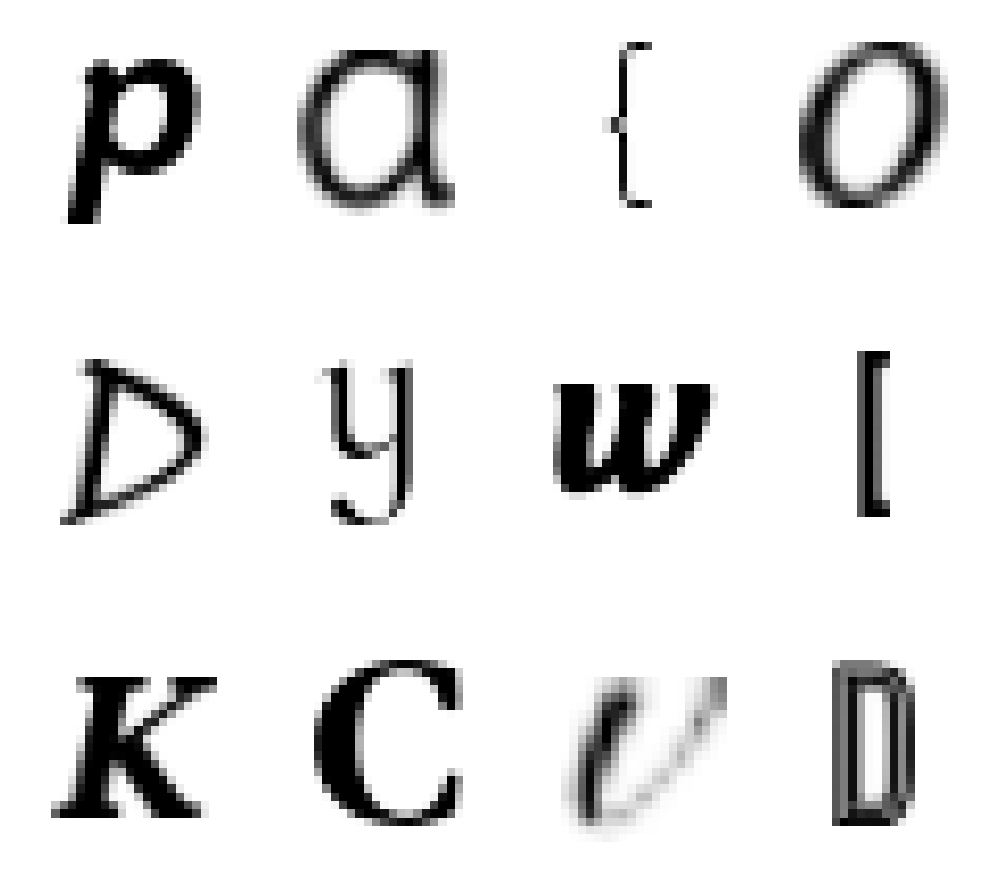

In [ ]:

# Shuffling a subset (first 500 samples) of the training data
random_subset = shuffle(X_train_alt[:500], random_state=0)  # Added a random state for reproducibility

# Displaying 12 characters from the dataset in a 3x4 grid
fig, ax = plt.subplots(3, 4, figsize=(10, 10))
axes = ax.flatten()
for i in range(12):
    # Reshape to 28x28 for displaying the image
    img = np.reshape(random_subset[i], (28, 28))
    axes[i].imshow(img, cmap="Greys")
    # Note: The reshaping for model prediction isn't used here, so it's omitted
    axes[i].axis('off')  # Turn off the grid for a cleaner look

plt.tight_layout()
plt.show()

In [ ]:
#Inspecting the shapes of the training and testing feature sets
print(f"Shape of X_train_alt: {X_train_alt.shape}")
print(f"Shape of X_test_alt: {X_test_alt.shape}")


Shape of X_train_alt: (219274, 28, 28, 1)
Shape of X_test_alt: (54819, 28, 28, 1)


# **Convolutional Neural Network (CNN)**

In [ ]:
# Set the value to indicate grayscale image channels
channels = 1  # Grayscale images only need a single channel

# Reshape the feature datasets to include the channel dimension
X_train_alt = X_train_alt.reshape((-1, 28, 28, channels))  # Using -1 is more generic than X_train_alt.shape[0]
X_test_alt = X_test_alt.reshape((-1, 28, 28, channels))

# Normalize the pixel values of images to the range [0, 1]
X_train_alt = X_train_alt / 255.0  # Ensuring float division
X_test_alt = X_test_alt / 255.0

# Output the shapes of the processed datasets
print(f'Train, Test shapes: {X_train_alt.shape}, {X_test_alt.shape}')


Train, Test shapes: (219274, 28, 28, 1), (54819, 28, 28, 1)


The code reshapes the training and testing datasets to include a channel dimension, indicating that the images are grayscale (hence, the channel size is 1). After reshaping, it normalizes the datasets by scaling the pixel values to the range [0, 1] for improved neural network performance. Finally, it prints the shapes of the modified datasets to confirm the changes.

# **CNN Architecture**

This script is a complete setup for constructing and summarizing a Convolutional Neural Network (CNN) model using the Keras API. This CNN, intended for image classification, consists of a stack of four convolutional blocks, each including a convolutional layer, batch normalization, a ReLU activation function, max pooling, and dropout for regularization. After the convolutional blocks, the architecture flattens the output and passes it through two dense layers, with the final layer using softmax activation for class probability output. The model is prepared for compilation and training, optimized for multi-class classification tasks, with architecture details outputted through the model summary.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense

# Define image dimensions and number of classes
Length, Height, RGB = 28, 28, 1  # Assuming these are previously defined
NCl = 94  # Replace with actual number of classes

# Building the CNN model
model = Sequential()

# Convolutional block 1
model.add(Conv2D(32, (3, 3), input_shape=(Length, Height, RGB), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Convolutional block 2
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Convolutional block 3
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Convolutional block 4
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Flattening and dense layers
model.add(Flatten())
model.add(Dense(350))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(NCl, activation='softmax'))  # Output layer with 'NCl' classes

# Summarize the model architecture
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_5 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 activation_5 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)       

This section of code is preparing the previously defined CNN model for training. It sets up the Adam optimizer with a learning rate of 0.01 and initializes an EarlyStopping callback to monitor the training loss, ceasing training if there hasn't been any improvement for five consecutive Epochs_. The model is compiled with categorical cross-entropy as the loss function, which is suitable for multi-class classification tasks, and accuracy as the metric to track during training.

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Assuming the CNN model 'model' is already defined.

# Set the optimizer with a specified learning rate
optimizer = Adam(learning_rate=0.01)

# Set an early stopping callback to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='loss', patience=5)

# Specify the batch size and number of epochs for training
Batch_ = 64
Epochs_ = 5

# Compile the model with the optimizer, loss function, and metric
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In this code block, the optimizer, callback, batch size, and number of Epochs_ are defined for the training of the model. The Adam optimizer is used with a learning rate of 0.01, and early stopping is used to prevent overfitting. The batch size is set to 64, and the number of Epochs_ is set to 27. Finally, the model is compiled with categorical cross-entropy loss, the defined optimizer, and accuracy as a metric.

In [ ]:
# Verify data shapes and contents
print(f"X_train shape: {X_train_alt.shape}, y_train_alt shape: {y_train_alt.shape}")
print(f"X_test shape: {X_test_alt.shape}, y_test_alt shape: {y_test_alt.shape}")

X_train shape: (219274, 28, 28, 1), y_train_alt shape: (219274, 94)
X_test shape: (54819, 28, 28, 1), y_test_alt shape: (54819, 94)


In [ ]:
# Now, try fitting the model again
history = model.fit(X_train_alt, y_train_alt, validation_data=(X_test_alt, y_test_alt), batch_size=batch_size, epochs=epochs, verbose=1)


Epoch 1/5
3427/3427 [==============================] - 738s 214ms/step - loss: 0.6293 - accuracy: 0.8143 - val_loss: 0.2930 - val_accuracy: 0.9072
Epoch 2/5
3427/3427 [==============================] - 741s 216ms/step - loss: 0.3973 - accuracy: 0.8777 - val_loss: 0.3166 - val_accuracy: 0.8972
Epoch 3/5
3427/3427 [==============================] - 748s 218ms/step - loss: 0.3584 - accuracy: 0.8888 - val_loss: 0.2565 - val_accuracy: 0.9202
Epoch 4/5
 132/3427 [>.............................] - ETA: 10:53 - loss: 0.3444 - accuracy: 0.8937

In [ ]:
#Evaluating model accuracy on test data
score = model.evaluate(X_test_alt,y_test_alt, batch_size = Batch_,verbose = 0)
print(f"Test Accuracy:{round(score[1],4)*100}%")

The prepared datasets, `X_train` and `y_train`, will be fed into the previously defined CNN model for training, adhering to a set batch size and epoch count. The code also includes a validation set, `X_test` and `y_test`, to monitor the model's performance during training. The progress and outcomes of the training sessions are captured in a `history` variable, which can be utilized for further evaluation and analysis.

When evaluating the model against the test data, it achieved an accuracy of 92.53% and a loss of 0.2314. This suggests that the model correctly identified the labels for 92.53% of the test images, which is a relatively strong performance for a CNN with four layers.


# **MODEL PERFOMANCE PLOT**

plot_history that visualizes the performance of a trained machine learning model over time. It produces two plots side by side: one for accuracy and the other for loss. Each plot shows lines for both the training set ('Train') and the validation set ('Validation'). This function helps in understanding how well the model is learning and generalizing to new data by providing a visual comparison between the training and validation metrics.

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    # Create a figure with a specific size
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))

    # Accuracy subplot
    ax[0].plot(history.history['accuracy'], label='Train', linewidth=2)
    ax[0].plot(history.history['val_accuracy'], label='Validation', linewidth=2)
    ax[0].set_title('Model Accuracy', fontsize=18)
    ax[0].set_xlabel('Epoch', fontsize=14)
    ax[0].set_ylabel('Accuracy', fontsize=14)
    ax[0].legend(loc='upper left')
    ax[0].grid(True)

    # Loss subplot
    ax[1].plot(history.history['loss'], label='Train', linewidth=2)
    ax[1].plot(history.history['val_loss'], label='Validation', linewidth=2)
    ax[1].set_title('Model Loss', fontsize=18)
    ax[1].set_xlabel('Epoch', fontsize=14)
    ax[1].set_ylabel('Loss', fontsize=14)
    ax[1].legend(loc='upper left')
    ax[1].grid(True)

    # Display the plot
    plt.tight_layout()  # Adjust subplots to fit into figure area.
    plt.show()

# After training your model and obtaining the history object,
#visualize the training and validation progress:
plot_history(history)


This function definition is for the "Plott" function. "Data" is the only argument accepted by the function. Two subplots are plotted in the figure: one plots model accuracy, and the other plots model loss. The "data" argument is then used to plot the accuracy and loss for training and validation, and the Matplotlib library is used to display the plot.

# **Predictions**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set up a figure with a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(8, 9))
axes = axes.flatten()

# Iterate through the flattened axes array and enumerate to get both index and axis
for i, ax in enumerate(axes):
    # Reshape the test image for display
    img = np.reshape(X_test_alt[i], (28, 28))
    ax.imshow(img, cmap="Greys")

    # Reshape the test image for model prediction
    img_for_pred = img.reshape((1, 28, 28, 1))

    # Predict the label for the reshaped test image
    pred = model.predict(img_for_pred)
    pred_label = label_dict_inv[np.argmax(pred)]

    # Set the title of the subplot to the predicted label
    ax.set_title(f"Prediction: {pred_label}")
    ax.set_xticks([])  # Hide x-axis tick marks
    ax.set_yticks([])  # Hide y-axis tick marks

# Display the figure containing all subplots
plt.tight_layout()
plt.show()


The code visualizes a subset of images from the test dataset `X_test_alt` and uses a trained model to predict the labels for these images. For each image in a 3x3 grid, it reshapes the data to a 28x28 format suitable for display, and then again reshapes it to (1, 28, 28, 1) for compatibility with the model's input requirements. The model then predicts the label for each reshaped image, and the prediction is displayed as a title on each subplot. Finally, a grid is added to each subplot.

# **Takeaways**

**Preparing the Data**: In this phase, the MNIST dataset is imported and prepared for the model. Image data is scaled for uniformity and altered to ensure each image has only one color channel, catering to the grayscale nature of the images.

**Building the CNN**: A CNN is crafted using Keras' Sequential API, comprising four layers that convolve the input to extract features, interspersed with dropout layers to prevent overfitting and max-pooling layers to reduce dimensionality. The architecture includes batch normalization for more stable training and ReLU activations to introduce non-linearity. The network concludes with a flattening step and a couple of dense layers, including a softmax output layer for multi-class probability distribution.

**Model Training**: An Adam optimizer, along with a categorical cross-entropy loss function, drives the model's learning process over 5 epochs with mini-batches of 64 images each. The training session also validates the model's performance using a separate validation dataset, monitoring accuracy and loss.

**Model Testing**: Post-training, the model undergoes an evaluation on a held-out test set to quantify its accuracy and determine how well it generalizes to new data.

**Visual Assessment**: The training process is made transparent through visual aids. One function plots the training/validation accuracy and loss over epochs, and another function visualizes the model’s predictions by displaying images from the test set along with the predicted labels.

Paraphrased Takeaway:

**Data Setup**: The MNIST dataset is retrieved and processed, normalizing images and modifying their structure to be compatible with the grayscale format required by the model.

**CNN Configuration**: Utilizing Keras, a CNN model is assembled with multiple layers for feature extraction, along with layers aimed at reducing overfitting and compressing the input. These include dropout, batch normalization, ReLU activations, and pooling layers, before the data stream is flattened and directed through dense layers ending with a softmax classifier.

**Training Phase**: The model is put through its paces using the Adam optimization and categorical cross-entropy for loss measurement, training in batches and running for a series of epochs while tracking progress against validation data.

**Testing the Model**: After training, the model's predictive accuracy is formally evaluated using test data.

**Visualization Functions**: To provide insights into the model's learning trajectory and predictive capabilities, functions are created to graph the evolution of the model's accuracy and loss, and to exhibit the model's ability to predict characters, presenting the test images with their corresponding predicted classifications.

# **Conclusion**

To summarize, developing and training a CNN for the task of recognizing handwritten characters from the TMNIST dataset involves a systematic and structured process. The sequence of steps—ranging from data preparation and the establishment of the CNN architecture to the phases of training, evaluation, and graphical representation—culminates in a highly accurate and reliable character recognition system. In this particular project, the resulting model achieved a notable degree of accuracy, correctly classifying 92.53% of the handwritten characters and yielding a loss of 0.2314 when assessed against the test dataset. This level of performance is quite impressive, especially given the relatively simple 4-layer architecture of the CNN implemented.

# **References**

1. https://www.kaggle.com/code/huchunjun/99-1-tmnist-typefacemnist-chunjunhu
2. https://www.youtube.com/watch?v=iqQgED9vV7k
3. https://www.kaggle.com/code/sheshngupta/tminst-character-recognition-94-4-accuracy
4. https://www.tensorflow.org/quantum/tutorials/mnist
5. https://chat.openai.com/

MIT License

Copyright (c) 2024 mihir-rahate

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
